# 데이터 다운로드 및 업로드
### healthcare-dataset-stroke-data.csv 파일을 다운로드 받기**
### https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


1. 데이터 로딩
2. EDA
  - 피처간 상관관계 보기
  - 카운트 플랏 
3. 데이터 전처리
  - 불필요한 Feature 제거
  - 결측치 처리
  - 문자열 데이터 숫자로 인코딩 
4. 머신러닝 모델 만들기
  - 학습/테스트 데이터 준비하기
  - 학습모델 학습하기
5. 성능평가
  - 모델 테스트하기
  - 성능 평가하기

In [5]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.shape

(5110, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 불필요한 Feature 제거

In [11]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA(탐색적 데이터 분석)
- 데이터 통계량 확인하기
- 데이터의 특징 파악하기
- feature들 간의 상관관계
- feature와 target과의 관계에서 어떤 특징들이 있는지 탐색하기

In [12]:
# 수치형 데이터 통계량 확인하기
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 테이블 데이터 통계 확인

In [13]:
# 범주형 데이터 컬럼 리스트 추출
cat_columns = [col for col in df.columns if df[col].dtypes == 'object']
cat_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [14]:
# 수치형 데이터 컬럼 리스트 추출
num_columns = [col for col in df.columns if df[col].dtypes != 'object']
num_columns


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [15]:
# 문자형 데이터 통계 확인
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [16]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
# 수치형 데이터 기초 통계 확인
df[num_columns].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## 데이터 시각화로 탐색하기

<AxesSubplot:xlabel='gender', ylabel='count'>

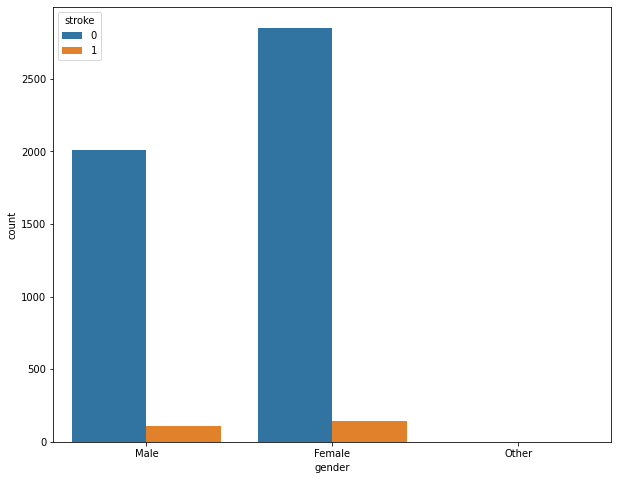

In [19]:
# 성별에 따른 stroke의 0. 1 환자수 카운트 시각화 
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='gender', hue='stroke')

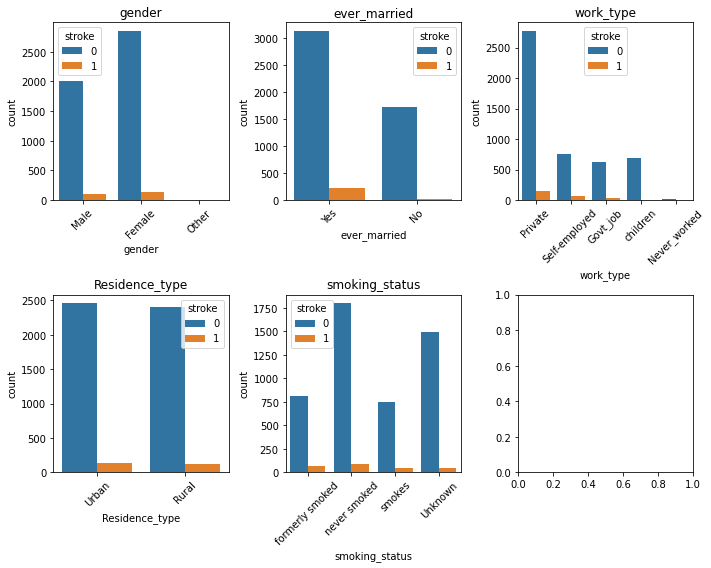

In [20]:
# 문자형 데이터 개별 값과 stroke와의 관계 확인하기
nrows, ncols = 2, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10,8)
ax_list = ax_list_list.reshape(nrows * ncols)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.

for i in range(len(cat_columns)):
    col = cat_columns[i]
    g = sns.countplot(data=df, x=col, hue='stroke', ax=ax_list[i])
    g.set_title(col)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)   # x축 레이블 각도 조절
    
plt.tight_layout()
plt.show()

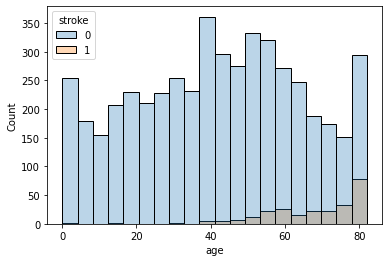

In [21]:
# 나이와 stroke과의 관계 확인하기(histplot())
sns.histplot(data=df, x='age', hue='stroke', alpha=0.3);

In [22]:
df['bmi'].count()

4909

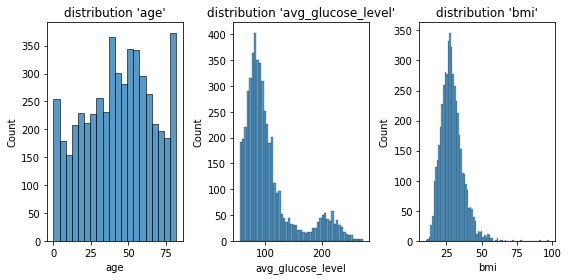

In [23]:
# sns.histplot()으로, 수치형 데이터의 분포 알아보기
num_columns_g = ['age', 'avg_glucose_level', 'bmi']
nrows, ncols = 1, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,4)
ax_list = ax_list_list.reshape(nrows * ncols)

for i in range(len(num_columns_g)):
    col = num_columns_g[i]
    #sns.histplot(data=titanic_df, ax=ax_list[i])
    sns.histplot(data=df.loc[:, num_columns_g[i]], ax=ax_list[i])
    ax_list[i].set_title(f"distribution '{col}'")
    
plt.tight_layout()
plt.show()

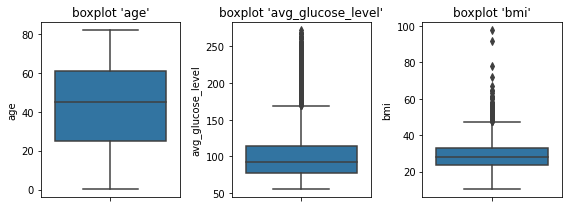

In [24]:
# 통계량은 boxplot으로 살펴보고, sns.boxplots() 활용
nrows, ncols = 1, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,3)
ax_list = ax_list_list.reshape(nrows * ncols)

for i in range(len(num_columns_g)):
    col = num_columns_g[i]
    sns.boxplot(data=df, y=col,  ax=ax_list[i])
    ax_list[i].set_title(f"boxplot '{col}'")
    
plt.tight_layout()
plt.show()

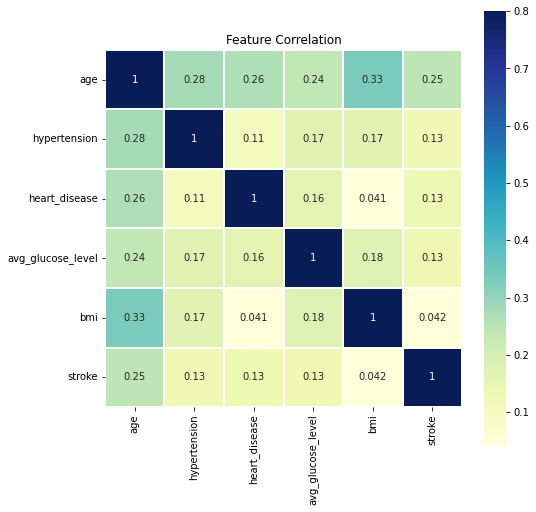

In [25]:
# 피처들간의 상관관계 살펴보기
corr = df.corr()
plt.figure(figsize=(8, 8));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

## 결측치 처리하기

In [26]:
# 결측데이터 확인하기
df.null().issum()

AttributeError: 'DataFrame' object has no attribute 'null'

In [ ]:
# 결측데이터 
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

## 문자형 데이터 숫자로 encoding하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [28]:
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [29]:
# LabelEncoder 적용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['work_type'] = le.fit_transform(df['work_type'])
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [30]:
# one-hot-encoding 적용
df = pd.get_dummies(df, columns=cal_columns)

NameError: name 'cal_columns' is not defined

In [31]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1


## 트레이닝 데이터 준비하기

In [32]:
X = df.drop('stroke', axis = 1) # 독립변수, 설명변수, feature
y = df['stroke']  # 종속변수, target

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

## Decision Tree로 뇌졸증 예측해보기

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [35]:
from sklearn.metrics import classification_report

In [36]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [38]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

### XGBClassifier
- https://xgboost.readthedocs.io/en/stable/
- 한글 정리문서 : https://wooono.tistory.com/97

In [39]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
#xgb_clf = XGBClassifier(objectivate='binary:logistic')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

accuracy : 0.9452054794520548


In [40]:
# new 방법 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.25      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.60      0.53      0.53      1022
weighted avg       0.92      0.95      0.93      1022



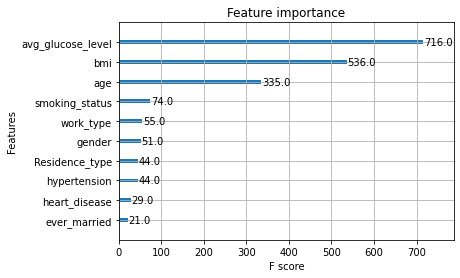

In [41]:
#xgboost의 강력한 기능 Feature Importance 확인
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_clf)
pyplot.show()


1. 윈도우 패키지 다운로드 및 설치
  - 가상환경에 설치 : pip install graphviz
  - 윈도우 : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
2. 환경변수 설정 : path 지정(예시)
  >User - C:\Program Files\Graphviz2.38\bin  
  >System - C:\Program Files\Graphviz2.38\bin  
3. 환경변수 적용 방법
  >1) 리부팅하기
  >2) 다음의 CLI 명령 실행(노리팅으로 적용 방법)  
    taskkill /f /im explorer.exe

[path 문제 해결 방법] 참고 
https://free-eunb.tistory.com/14

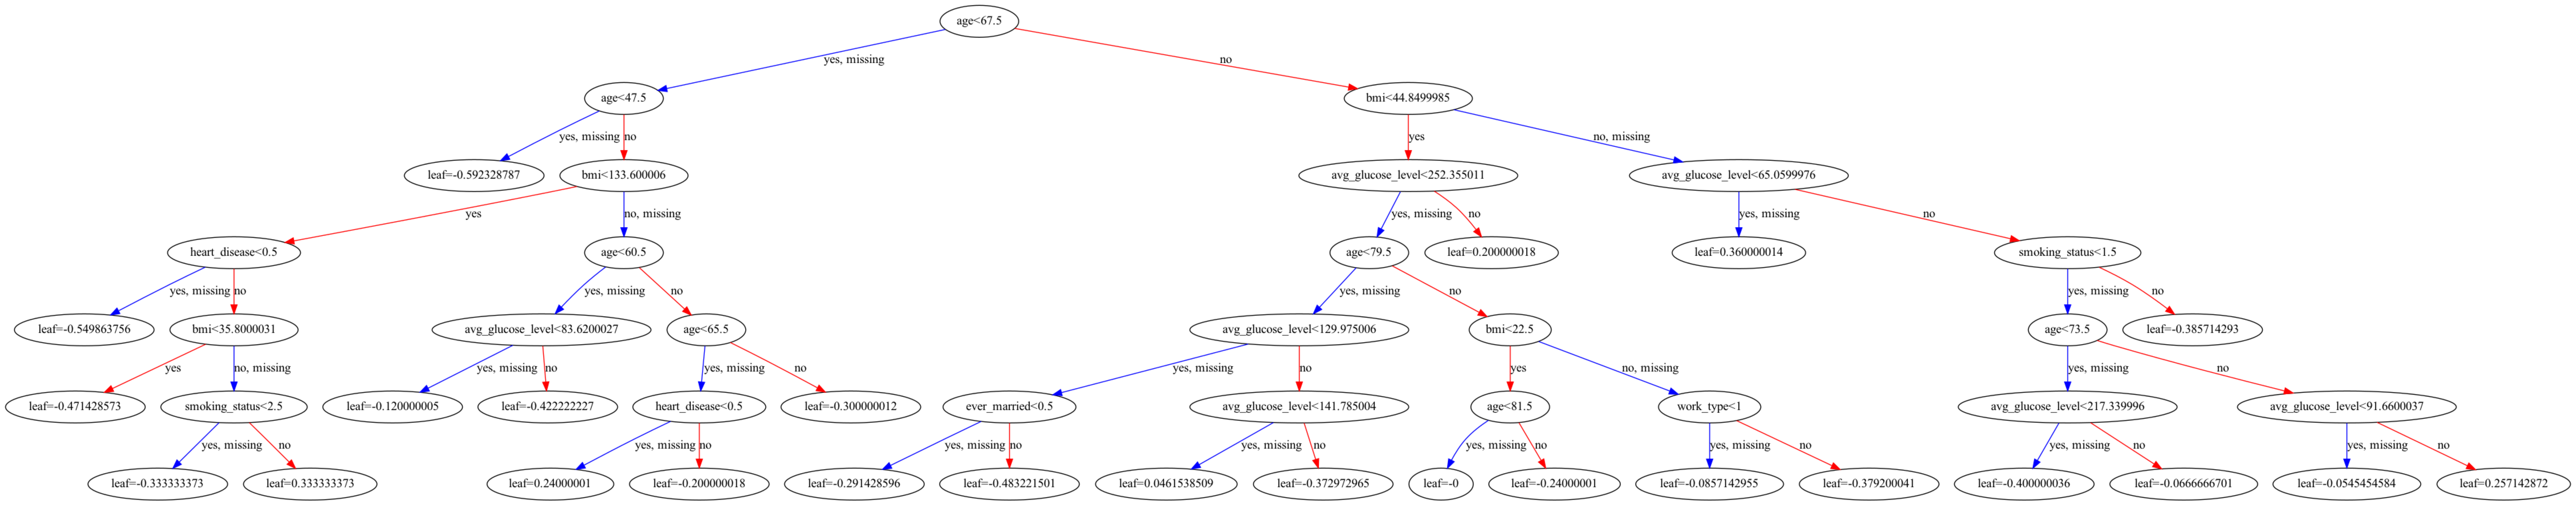

In [42]:
  import xgboost as xgb
  import matplotlib.pyplot as plt

  # num_trees : 그림을 여러개 그릴시 그림 번호
  # rankdir : 트리의 방향, 디폴트는 위아래 방향
  # rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
  # rankdir="TB" : 위에서 아래쪽 방향으로 트리를 보여준다.
  xgb.plot_tree(xgb_clf, num_trees=0, rankdir='TB')

  fig = plt.gcf()
  fig.set_size_inches(150, 150)

  # 이미지 저장하고 싶다면
  fig.savefig('tree.png')

  plt.show()

케글 도전하기 
titanic 생존자 예측, 
다운로드 받아서 모델 만들고, kaggle에 도전하기  
https://www.kaggle.com/competitions/titanic